CSCE 5300 - ASSIGNMENT 5 

Name: Megna Anand Kunden

In [21]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier


In [22]:
# Importing the dataset "Superstore" file and reading it using Pandas

store = "C:/Users/Megna Kunden/Downloads/Superstore.csv"
df = pd.read_csv(store)
df.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

In [23]:
# Finding null values in the dataset

null = df.isnull().sum()
print(null)
print("\n" + "The total number of null values present in the dataset are: "+ str(df.isnull().sum().sum()))

Category               0
City                   0
Container              0
Customer ID            0
Customer Name          0
Customer Segment       0
Department             0
Discount               0
Item ID                0
Item                   0
Number of Records      0
Order Date             0
Order ID               0
Order Priority         0
Order Quantity         0
Postal Code            0
Product Base Margin    0
Profit                 0
Region                 0
Row ID                 0
Sales                  0
Ship Date              0
Ship Mode              0
Shipping Cost          0
State                  0
Unit Price             0
dtype: int64

The total number of null values present in the dataset are: 0


In [24]:
# Mentioning the numerical column features and target variable from the dataset

col_features = ["Sales", "Discount", "Profit", "Shipping Cost", "Unit Price"]
col_variables = "Customer Segment"

In [25]:
# Droping the rows with missing values using dropna function

df = df.dropna(subset=col_features + [col_variables])

In [26]:
# Encoding target variable using the label encoder

target = LabelEncoder()
df[col_variables] = target.fit_transform(df[col_variables])

In [27]:
# Splitting the dataset by taking the test size as 0.2 

target1 = df[col_features]
target2 = df[col_variables]
target1_train, target1_test, target2_train, target2_test = train_test_split(target1, target2, test_size=0.2, random_state=42)

In [ ]:
# The features of the dataset are scaled using the standard scaler

scaler = StandardScaler()
target1_train_scaled = mk.fit_transform(target1_train)
target1_test_scaled = mk.transform(target1_test)

In [29]:
# Next, the SVM model is trained using the kernal as linear and random state as 42

svm = SVC(kernel="linear", random_state=42)
svm.fit(target1_train_scaled, target2_train)

SVC(kernel='linear', random_state=42)

In [30]:
# Making predictions using the predict function

target2_pred = svm.predict(target1_test_scaled)

In [31]:
# Checking the accuracy of the model

acu = accuracy_score(target2_test, target2_pred)
print(f"The Accuracy of the SVM Model is: {acu:.2%}")

The Accuracy of the SVM Model is: 35.15%


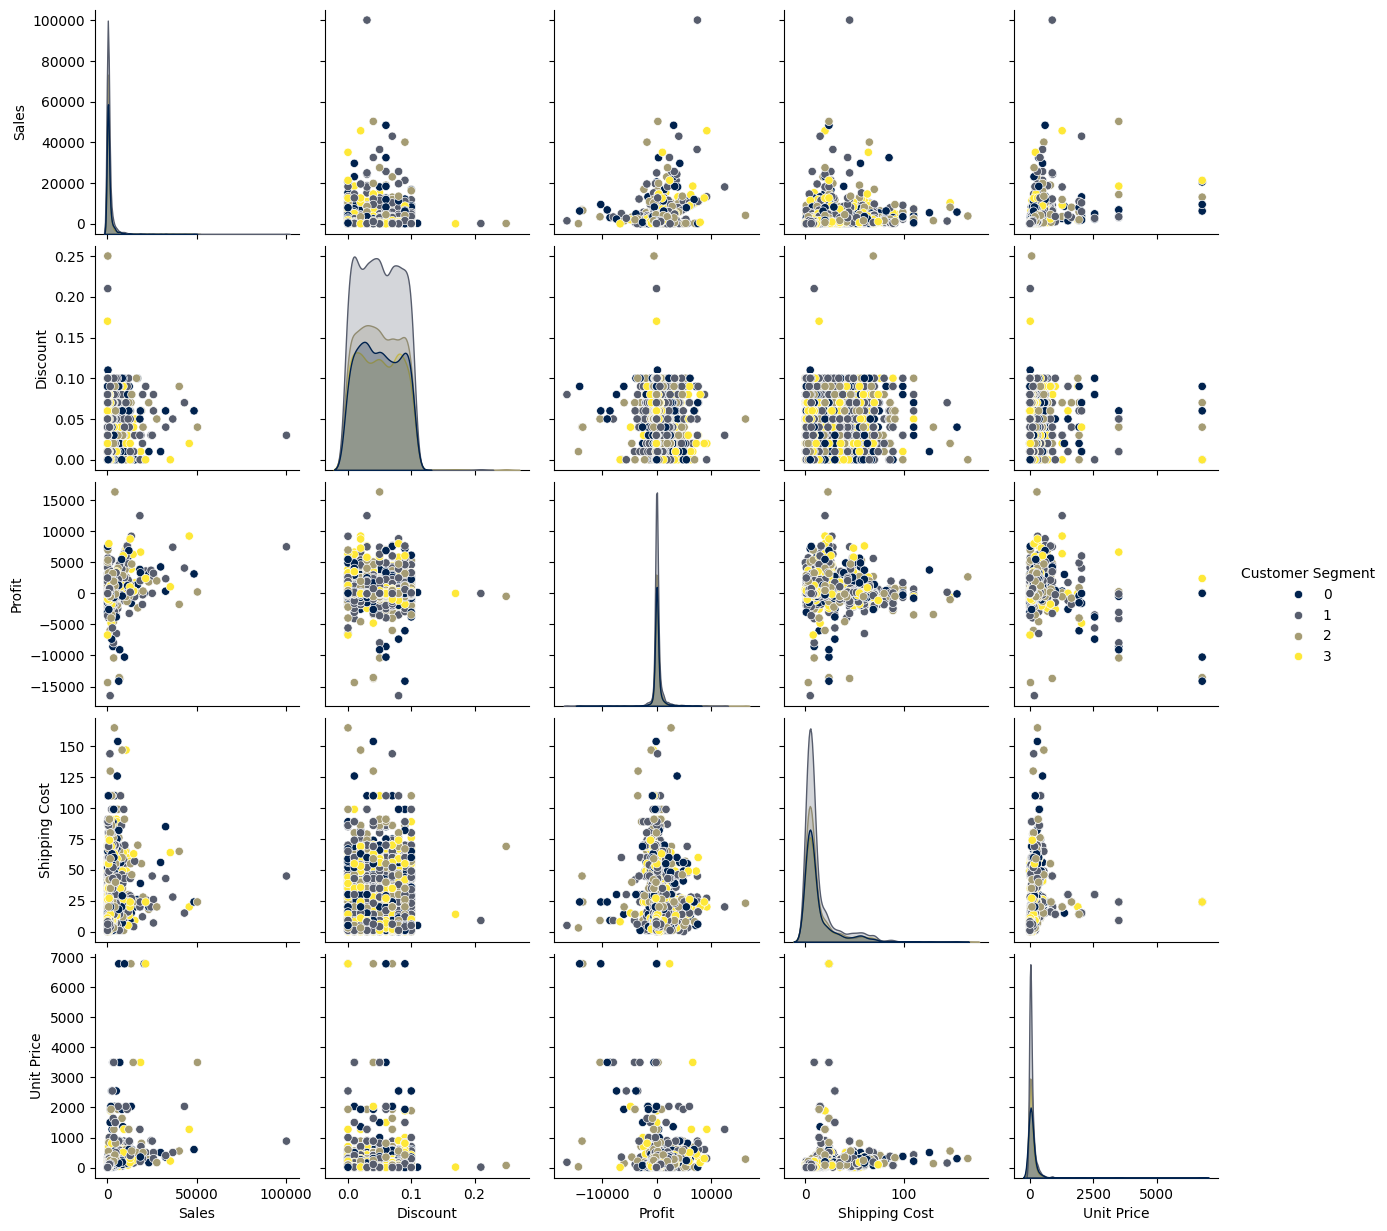

In [32]:
# All features are visualized by pairplotting the training dataset

meg = target1_train.copy()
meg[col_variables] = target2_train
sns.pairplot(meg, hue=col_variables, palette='cividis')
plt.show()

c:\Users\Megna Kunden\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


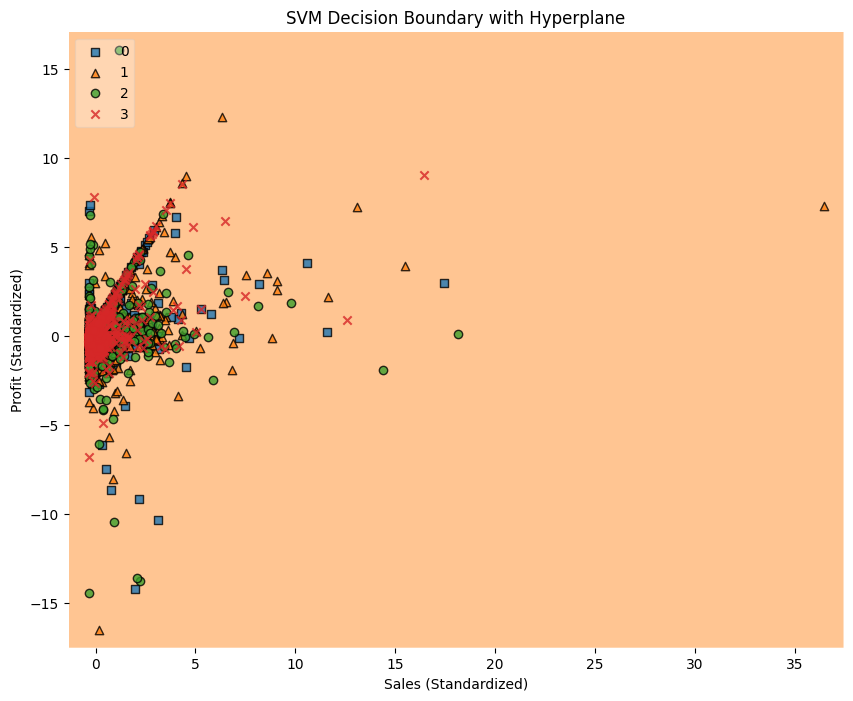

In [33]:
# Plotting SVM decision Boundary for Sales and Profit

target1_train_2D = target1_train_scaled[:, [0, 2]]                    # two features for visualization
svm_model_2D = SVC(kernel="linear", random_state=42)
svm_model_2D.fit(target1_train_2D, target2_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(target1_train_2D, target2_train.to_numpy(), clf=svm_model_2D, legend=2)
plt.xlabel("Sales (Standardized)")
plt.ylabel("Profit (Standardized)")
plt.title("SVM Decision Boundary with Hyperplane")
plt.show()


RANDOM FOREST

In [34]:
# Selecting features and target variable
features = ["Sales", "Profit"]  # Limited to two features for visualization
target = "Customer Segment"

In [35]:
# Encoding the target variable
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

In [36]:
# Extracting numerical features and target
X = df[features].values
y = df[target].values

In [37]:

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)

In [41]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.30


C:\Users\Megna Kunden\AppData\Local\Temp\ipykernel_35112\192569434.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=feature_importances, palette='viridis')


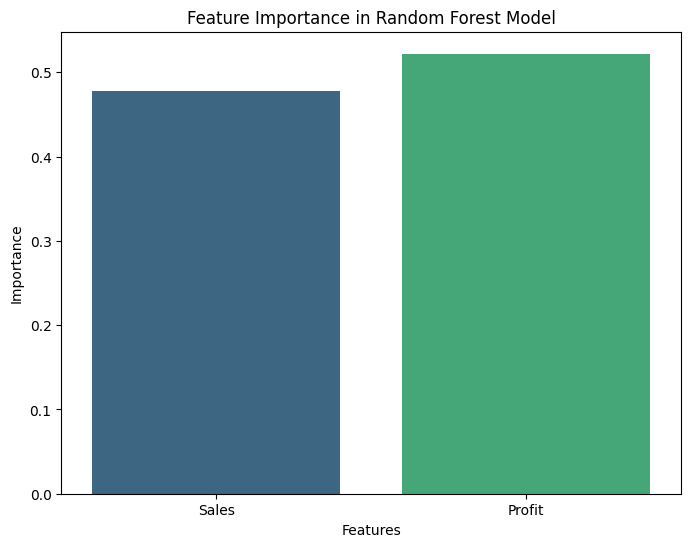

In [42]:
# Plot feature importance
plt.figure(figsize=(8, 6))
feature_importances = rf_model.feature_importances_
sns.barplot(x=features, y=feature_importances, palette='viridis')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

SUMMARY REPORT:

1. In this assignment 5 of Coding Data Learning Methods, I first imported all the necessary and imported libraries required to code for Support Vector Machine (SVM). <br>
2.	Next, I imported my dataset entitled “Superstore” in the code using the library pandas. <br>
3.	In the next step, I mentioned a few columns as megna1 and customer segment column as megna2. <br>
4.	Then, I dropped the columns from the dataset having missing values using dropna function. <br>
5.	I encoded the target variable with the help of the label encoder and later split the the dataset into both training and testing using train_test_split and taking the test size as 0.2 to receive an output for this code snippet. <br>
6.	Scaling of dataset is done using standard scaler and trained the SVM model using the kernel as linear the random state value as 42. <br>
7.	Did predictions using the y predict function and checked the model accuracy. <br>
8.	Then, I plotted the training dataset using the plt function and took the color palette as cividis. <br>
9.	Next plotted the SVM decision boundary with hyperplane for sales and profit. <br>
10.	What I learnT from this assignment is that the use of SVM can be helpful in writing codes making use of a dataset by deriving meaningful and necessary insights. <br>

